In [7]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_20newsgroups
import nltk

In [24]:
categories_3 = ['talk.religion.misc', 'comp.graphics', 'sci.space']

groups_3 = fetch_20newsgroups(categories=categories_3)

In [25]:
count_vector_sw = CountVectorizer(stop_words="english", max_features=500)

In [26]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [33]:
from nltk.corpus import names
all_names = set(names.words())

data_cleaned = []

for doc in groups_3.data:
    doc = doc.lower()
    doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() if word.isalpha() and word not in all_names)
    data_cleaned.append(doc_cleaned)


In [15]:
data_cleaned_count_3 = count_vector_sw.fit_transform(data_cleaned)

tsne_model = TSNE(init="random", n_components=2,  perplexity=40, random_state=42, learning_rate=500)

data_tsne = tsne_model.fit_transform(data_cleaned_count_3.toarray())

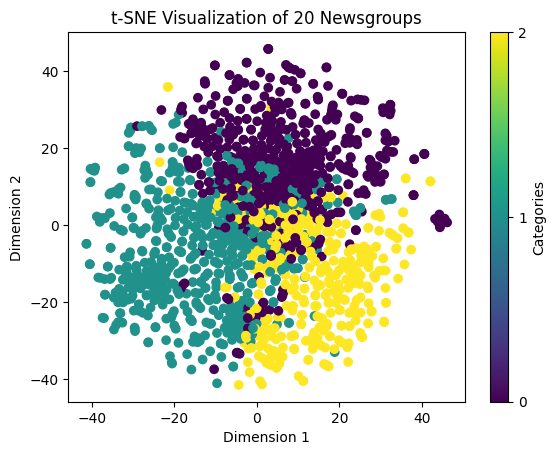

In [16]:
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=groups_3.target, cmap='viridis')
plt.title('t-SNE Visualization of 20 Newsgroups')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(ticks=range(len(categories_3)), label='Categories')
plt.show()


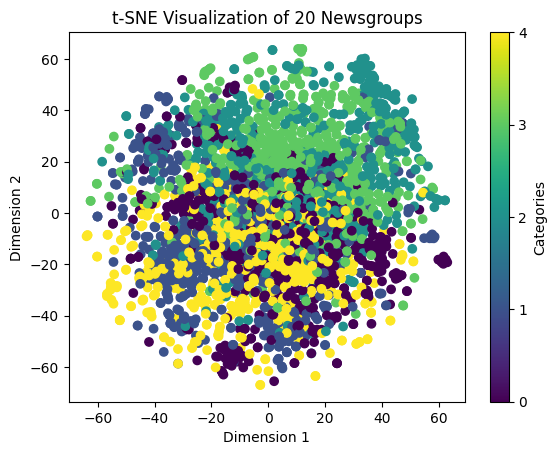

In [17]:
categories_5 = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
                'comp.windows.x']
groups_5 = fetch_20newsgroups(categories=categories_5)

count_vector_sw = CountVectorizer(stop_words="english", max_features=500)

data_cleaned = []

for doc in groups_5.data:
    doc = doc.lower()
    doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() if word.isalpha() and word not in all_names)
    data_cleaned.append(doc_cleaned)

data_cleaned_count_5 = count_vector_sw.fit_transform(data_cleaned)

data_tsne = tsne_model.fit_transform(data_cleaned_count_5.toarray())

plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=groups_5.target, cmap='viridis')
plt.title('t-SNE Visualization of 20 Newsgroups')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(ticks=range(len(categories_5)), label='Categories')
plt.show()
